In [79]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC, export_graphviz
import pydot
import pydotplus
import re

import time

from IPython.display import Image

In [80]:
Train_data = pd.read_csv('./datalab/car_info_train.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51075 entries, 0 to 51074
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_ID               51075 non-null  object 
 1   CUST_SEX              51075 non-null  int64  
 2   CUST_AGE              50600 non-null  float64
 3   CUST_MARRY            12037 non-null  object 
 4   BUYERPART             51075 non-null  int64  
 5   CAR_MODEL             51075 non-null  object 
 6   CAR_COLOR             29763 non-null  object 
 7   CAR_AGE               51075 non-null  float64
 8   CAR_PRICE             51075 non-null  float64
 9   IS_LOAN               51075 non-null  float64
 10  LOAN_PERIED           45468 non-null  float64
 11  LOAN_AMOUNT           45468 non-null  float64
 12  F_INSORNOT            42924 non-null  float64
 13  ALL_BUYINS_N          46444 non-null  float64
 14  DLRSI_CNT             46444 non-null  float64
 15  GLASSBUYSEPARATE_CN

In [81]:
Train_data['CUST_AGE'] = Train_data.CUST_AGE.fillna(Train_data.CUST_AGE.mean()) #均值填充

# 分类
Train_data['CUST_AGE'] = Train_data.CUST_AGE.apply(lambda x: 1 if (x<=35 and x >=16) else 2 if (x >= 36 and x <= 60) else 3)
Train_data['CAR_AGE'] = Train_data.CAR_AGE.apply(lambda x: 1 if (x <=730) else 2 if (x >=731 and x <= 1460) else 3 if (x >= 1461 and x <= 2190) else 4 if (x >= 2191 and x <= 3650) else 5)
Train_data['CAR_PRICE'] = Train_data.CAR_PRICE.apply(lambda x: 1 if (x >=50000 and x <= 90000) else 2 if (x >= 90001 and x<= 150000) else 3 if (x >= 150001 and x <= 300000) else 4)
Train_data['LOAN_AMOUNT'] = Train_data.LOAN_AMOUNT.apply(lambda x: 1 if (x <= 50000) else 2 if(x >=50001 and x <= 200000) else 3 if(x >= 200001 and x <= 500000) else 4)

Train_data['CAR_MODEL'] = Train_data.CAR_MODEL.apply(lambda x: re.findall('\d', x)[0]).astype(int) #转换 int


In [82]:
# 获取数字特征列
numerical_cols = Train_data.select_dtypes(exclude = 'object').columns
print(numerical_cols)

Index(['CUST_SEX', 'CUST_AGE', 'BUYERPART', 'CAR_MODEL', 'CAR_AGE',
       'CAR_PRICE', 'IS_LOAN', 'LOAN_PERIED', 'LOAN_AMOUNT', 'F_INSORNOT',
       'ALL_BUYINS_N', 'DLRSI_CNT', 'GLASSBUYSEPARATE_CNT', 'SII_CNT',
       'IS_LOST'],
      dtype='object')


In [83]:
Train_data.head()

,CUST_ID,CUST_SEX,CUST_AGE,CUST_MARRY,BUYERPART,CAR_MODEL,CAR_COLOR,CAR_AGE,CAR_PRICE,IS_LOAN,LOAN_PERIED,LOAN_AMOUNT,F_INSORNOT,ALL_BUYINS_N,DLRSI_CNT,GLASSBUYSEPARATE_CNT,SII_CNT,IS_LOST
0,49BB37423D72EAABEF899EF02488F30C,2,1,NaN,1,2,NaN,1,2,1.0,5.0,2,1.0,1.0,0.0,0.0,0.0,0
1,303CC4F388283ABF7BADB6EF81D3D812,1,1,NaN,1,2,NaN,1,2,1.0,4.0,2,1.0,2.0,0.0,0.0,0.0,0
2,5DCFA06D1A001B1E2F3095B097B2A452,1,2,已婚,1,2,NaN,1,2,1.0,5.0,2,1.0,1.0,0.0,1.0,0.0,0
3,8B1284CF18DEA31A8C14A5A3554E50DC,1,2,NaN,1,2,NaN,1,2,1.0,4.0,2,1.0,2.0,1.0,0.0,0.0,0
4,FCD67DC870371A98FE382852328086BD,2,1,已婚,1,2,NaN,1,2,1.0,4.0,1,1.0,2.0,0.0,0.0,0.0,0


In [84]:
# 空值填充（0）
Train_data.fillna(value=0,inplace=True)

In [85]:
# 判断空值
Train_data.isnull().any()

CUST_ID                 False
CUST_SEX                False
CUST_AGE                False
CUST_MARRY              False
BUYERPART               False
CAR_MODEL               False
CAR_COLOR               False
CAR_AGE                 False
CAR_PRICE               False
IS_LOAN                 False
LOAN_PERIED             False
LOAN_AMOUNT             False
F_INSORNOT              False
ALL_BUYINS_N            False
DLRSI_CNT               False
GLASSBUYSEPARATE_CNT    False
SII_CNT                 False
IS_LOST                 False
dtype: bool

In [86]:
feature_cols = [col for col in numerical_cols if col != 'IS_LOST']
data = Train_data[feature_cols].fillna(value=0)
target = Train_data['IS_LOST']


,CUST_SEX,CUST_AGE,BUYERPART,CAR_MODEL,CAR_AGE,CAR_PRICE,IS_LOAN,LOAN_PERIED,LOAN_AMOUNT,F_INSORNOT,ALL_BUYINS_N,DLRSI_CNT,GLASSBUYSEPARATE_CNT,SII_CNT
0,2,1,1,2,1,2,1.0,5.0,2,1.0,1.0,0.0,0.0,0.0
1,1,1,1,2,1,2,1.0,4.0,2,1.0,2.0,0.0,0.0,0.0
2,1,2,1,2,1,2,1.0,5.0,2,1.0,1.0,0.0,1.0,0.0
3,1,2,1,2,1,2,1.0,4.0,2,1.0,2.0,1.0,0.0,0.0
4,2,1,1,2,1,2,1.0,4.0,1,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51070,2,2,1,6,3,3,1.0,4.0,2,1.0,2.0,0.0,1.0,0.0
51071,1,2,1,6,3,3,1.0,5.0,2,0.0,1.0,0.0,1.0,0.0
51072,1,2,1,6,3,3,1.0,5.0,2,1.0,1.0,1.0,1.0,0.0
51073,1,2,2,6,3,3,1.0,5.0,2,1.0,4.0,1.0,1.0,0.0


In [89]:
befordtc = DTC(criterion='entropy')
befordtc.fit(data, target)
print('准确率:', befordtc.score(data, target))
dtc = DTC(criterion='entropy',max_depth=4, max_leaf_nodes=5)
dtc.fit(data, target)
print('准确率:', dtc.score(data, target))


准确率: 0.8414880078316201
准确率: 0.7794811551639745


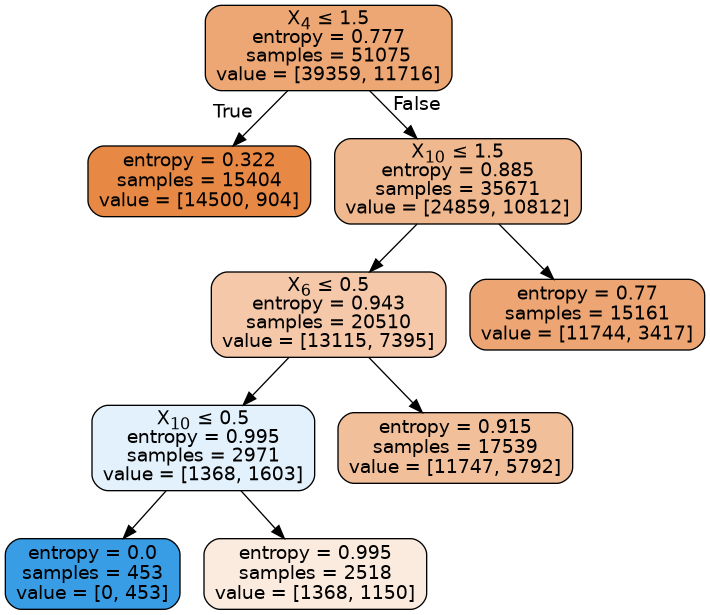

In [90]:
dot_data = tree.export_graphviz(dtc, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [91]:
with open('./tree.dot', 'w') as f:
    f = export_graphviz(dtc, feature_names=data.columns, out_file=f)
graph = pydotplus.graph_from_dot_file('./tree.dot')
graph.write_pdf("iris.pdf")

True